# Проект Procrastinate Pro+
<a id='start'></a>

#### Описание проекта 

Мы проводим аналитику развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

#### Цель исследования
- Определить причины убытков
- Дать рекомендации по улучшению ситуации

#### Описание данных
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.


Структура visits_info_short.csv
User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии.


Структура orders_info_short.csv
User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа.


Структура costs_info_short.csv
Channel — идентификатор рекламного источника,
Dt — дата проведения рекламной кампании,
Costs — расходы на эту кампанию.

 *Данные за 2016 год могут быть неполными. 

#### План работы 
Шаг 1. Загрузим данные и подготовим их к анализу. Проведем предобработку данных.


Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии


Шаг 3. Проведем исследовательский анализ данных

- 3.1. Создаим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.
- 3.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- 3.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- 3.4. Изучиим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.



Шаг 4. Маркетинг
4.1. Посчитаем общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам.
4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. 


Шаг 5. Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Проанализируем общую окупаемость рекламы и с разбивкой по рекламным каналам, странам, устройствам

Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Шаг 6. Напишем выводы



#   [Оглавление](#back)
<a id='back'></a>
- [Введение](#start)
- [Общая информация и предобработка данных](#info)
- [Ввод функций для расчета и анализа LTV, ROI, удержания и конверсии](#duplicated)
- [Исследование данных](#analit)
- [Маркетинг](#country)
- [Оценка окупаемости рекламы](#hypothesis)
- [Общий вывод](#end)

#  [Общая информация и предобработка данных](#back)
<a id='info'></a>

In [1]:
#импортируем необхоимые библиотеки
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy.stats as st
from datetime import datetime, timedelta

#cразу сделаем графики чуть больше и красивее
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7 
sns.set_style("darkgrid")



In [ ]:
#сохраним данные
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    
except:
    costs = pd.read_csv('C:\\Users\\TigrUno\\Desktop\\costs_info_short.csv')
    orders = pd.read_csv('C:\\Users\\TigrUno\\Desktop\\orders_info_short.csv')
    visits = pd.read_csv('C:\\Users\\TigrUno\\Desktop\\visits_info_short.csv')

### costs

Для удобства - сделаем все буквы в названиях столбцов - строчными:


In [2]:
costs = costs.rename(str.lower, axis='columns')

Cтобец 'dt' имеет тип object, меняем на тип datetime, категориальные столбцы приведем к нижнему регистру:

In [3]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['channel'] = costs['channel'].str.lower()

Проверим дубликаты и пропуски:

In [4]:
print(costs.duplicated().sum())
print(costs.isna().sum())

0
dt         0
channel    0
costs      0
dtype: int64


Посмотрим на данные после обработки:

In [5]:
costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


### orders

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Приведем названия столбцов к общему виду:

In [8]:
orders = orders.rename(columns={"User Id": "user_id", 
                                "Event Dt": "event_dt", 
                                "Revenue": "revenue"})

In [9]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Исправим тип в столбце 'event_dt'

In [10]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим дубликаты и пропуски:

In [11]:
print(costs.duplicated().sum())
print(costs.isna().sum())

0
dt         0
channel    0
costs      0
dtype: int64


Посмотрим на данные после обработки:

In [12]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### visits

In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [15]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [16]:
visits = visits.rename(columns={"User Id": "user_id", 
                                "Region": "region", 
                                "Device": "device", 
                                "Channel": "channel", 
                                "Session Start": "session_start", 
                                "Session End": "session_end"})

Приведем столбцы с датами к нужному типу, категориальные столбцы приведем к нижнему регистру:

In [17]:
visits["session_start"] = pd.to_datetime(visits["session_start"])
visits["session_end"] = pd.to_datetime(visits["session_end"])
for column in visits[["region","device","channel"]]:
    visits[column] = visits[column].str.lower()

Проверим дубликаты и пропуски:

In [18]:
print(costs.duplicated().sum())
print(costs.isna().sum())

0
dt         0
channel    0
costs      0
dtype: int64


In [19]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Вывод:

- Данные просмотренны и приведены к общему стилю: строчные буквы, змеиный шрифт в названиях столбцов.
- Изменены типы данных для параметров времени.
- Пропуски и дубликаты отсутствуют.
- Во всех датафреймах данные в хорошем состоянии

#  [Ввод функций для расчета и анализа LTV, ROI, удержания и конверсии](#back)
<a id='duplicated'></a>

#### Функция для создания пользовательских профилей


In [21]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
   
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = profiles['dt'].astype('datetime64')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчёта удержания

In [22]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии


In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта LTV и ROI


In [24]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания фрейма

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#  [Исследование данных](#back)
<a id='analit'></a>

### Получаем профили пользователей Procrastinate Pro+ и определяем минимальную и максимальную даты привлечения пользователей.

In [29]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united states 2019-05-07   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united states 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iphone         france 2019-10-01   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united states 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769  


Найдем минимальную и максимальную даты привлечения пользователей:

In [30]:
get_profiles(visits, orders, costs)['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [31]:
get_profiles(visits, orders, costs)['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

In [32]:
report = get_profiles(visits, orders, costs).query('datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 27).date()')

### Выводы:
- Получены данные пользователей
- На первый взгляд данные корректные
- Получены минимальная и максимальная даты привлечения пользователей
- Даты привелечения в диапазоне, объявленном в задании (с 1 мая по 27 октября 2019 года)

### Оценка пользователей с учетом региона, девайса и канала привлечения.

Создадим фунцкию для удобства оценки различных параметров для пользователей:

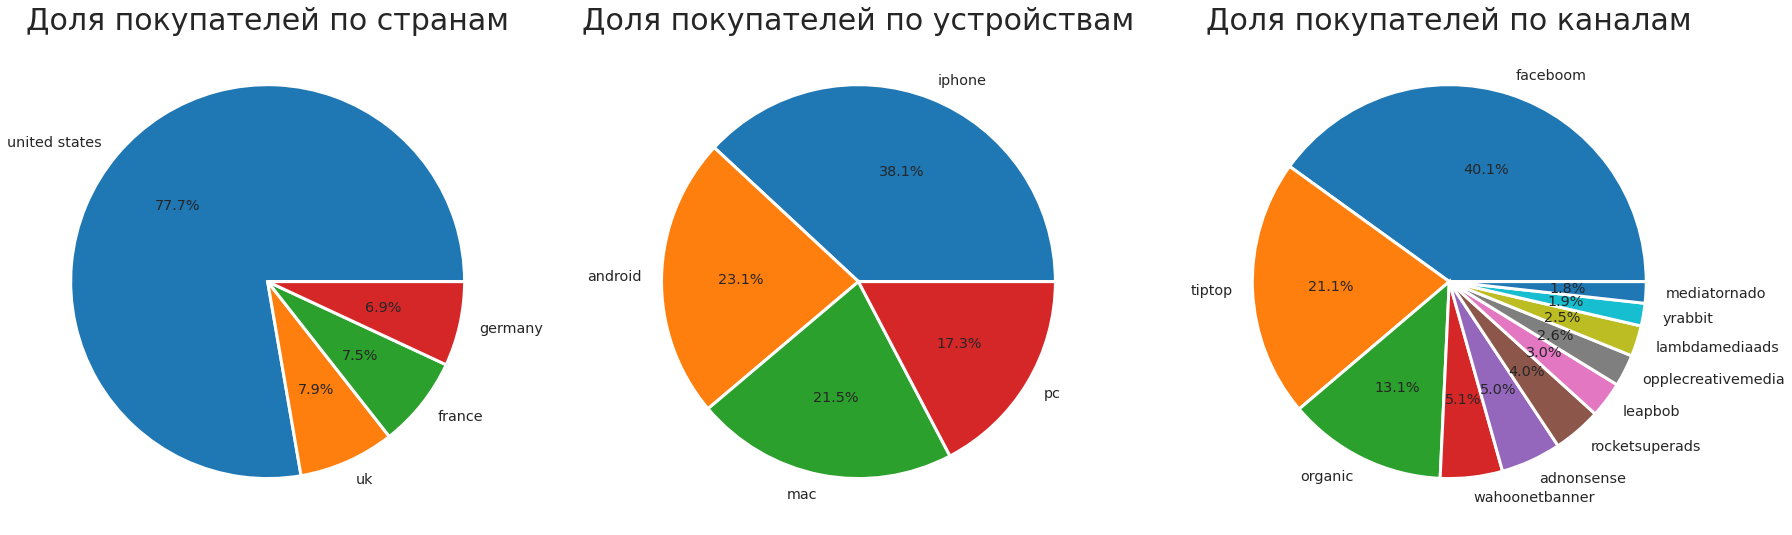

In [33]:
def graph_pie (parameter):
    y = get_profiles(visits, orders, costs).groupby(parameter).sum().sort_values(by='payer', ascending=False)['payer']
    labels = get_profiles(visits, orders, costs).groupby(parameter).sum().sort_values(by='payer', ascending=False).index
    y.plot.pie(y=y, 
                labels=labels, 
                autopct="%.1f%%", 
                legend = False, 
                wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                textprops={'size': 'x-large'}).set(ylabel='')

plt.figure(figsize=(30,30))

ax1 = plt.subplot(1, 3, 1)
plt.title ('Доля покупателей по странам', fontsize = 30)    
graph_pie ('region')

ax2 = plt.subplot(1, 3, 2)
plt.title ('Доля покупателей по устройствам', fontsize = 30)
graph_pie ('device')

ax3 = plt.subplot(1, 3, 3)
plt.title ('Доля покупателей по каналам', fontsize = 30)
graph_pie ('channel')



#### Выводы: 

- Большинство покупателей приходят из США. 
- Большинство пользоватей используют iPhone, затем идет android и mac. PC пользуется наименьшей популярностью.
- Основные каналы привлечения покупателей - faceboom, tiptop и "органические" пользователи. Все остальные занимают малые доли.

Создадим функицю для оценки конверсии пользователей с учетом разных параметров:

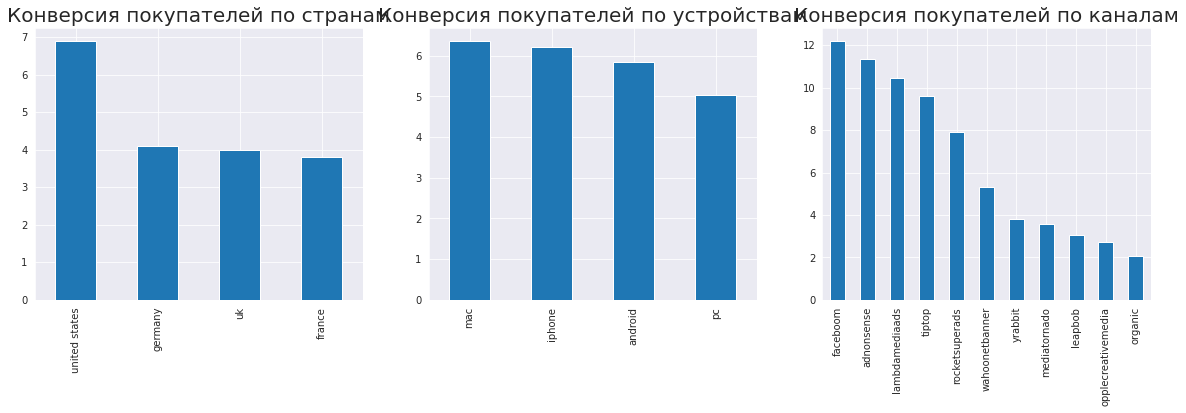

In [34]:
def graph_bar (parameter):
    y = get_profiles(visits, orders, costs).groupby(parameter).sum().sort_values(by='payer', ascending=False)['payer']
    x = get_profiles(visits, orders, costs).groupby(parameter).count().sort_values(by='user_id', ascending=False)['user_id']
    z = y/x*100
    z.sort_values(ascending = False).plot.bar().set(xlabel='')

plt.figure(figsize=(20,5))

ax1 = plt.subplot(1, 3, 1)
plt.title ('Конверсия покупателей по странам', fontsize = 20) 
graph_bar ('region')

ax1 = plt.subplot(1, 3, 2)
plt.title ('Конверсия покупателей по устройствам', fontsize = 20) 
graph_bar ('device')

ax1 = plt.subplot(1, 3, 3)
plt.title ('Конверсия покупателей по каналам', fontsize = 20) 
graph_bar ('channel')

#### Выводы:
- Лучше всего конвертируются покупатели из США. Остальные - примерно на одном уровне.
- По устройствам худшую конверсию показывают пользователи PC, остальные - примерно одинаковую.
- Конверсия faceboom наивысшая, а вот "органические" пользователи наоборот, в самом конце

### Вывод из исследовательского анализа данных

- Пользователи приходят из США (77.7%), Великобритании(7.9%), Франции(7.5%) и Германии(6.9%)
- Пользователи пользуются iPhone(38.1%), Android(23.1%), mac(21.5%) и PC(17.3%)
- В основном пользователи приходят из FaceBoom(40.1%), TipTop(21.1%). 13.1% пришли сами, остальные - занимают значительно меньшую долю

#  [Маркетинг](#back)
<a id='country'></a>

### Считаем общую сумму расходов на маркетиинг:

Искать будем двумя способами, для того, чтобы убедиться в правильности расчета:

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

print(roi)  # таблица ROI 

           cohort_size       cac       0.0       1.0       2.0      3.0  \
cohort                                                                    
All users       142620  0.694753  0.347269  0.447504  0.524031  0.58821   

                4.0      5.0       6.0       7.0       8.0       9.0  \
cohort                                                                 
All users  0.644131  0.69364  0.738771  0.779386  0.819299  0.855793   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.889256  0.920855  0.951833  0.979855  


In [36]:
max_acquisition_date = roi_history.reset_index()['dt'].max()
print(max_acquisition_date) 

2019-10-19 00:00:00


In [37]:
print(
   'Общие расходы на привлечение из таблицы ROI: {:.2f}'.format(
       roi.loc['All users', 'cac'] * roi.loc['All users', 'cohort_size']
   )
)

print(
   'Общие расходы на привлечение из таблицы costs: {:.2f}'.format(
       costs.query('dt <= @max_acquisition_date')['costs'].sum()
   )
) 

Общие расходы на привлечение из таблицы ROI: 99085.74
Общие расходы на привлечение из таблицы costs: 99085.74


Общие расходы совпадают

In [38]:
report.groupby('channel').sum().sort_values(by='acquisition_cost', ascending = False)['acquisition_cost']

channel
tiptop                54751.30
faceboom              32445.60
wahoonetbanner         5151.00
adnonsense             3911.25
opplecreativemedia     2151.25
rocketsuperads         1833.00
leapbob                1797.60
lambdamediaads         1557.60
mediatornado            954.48
yrabbit                 944.22
organic                   0.00
Name: acquisition_cost, dtype: float64

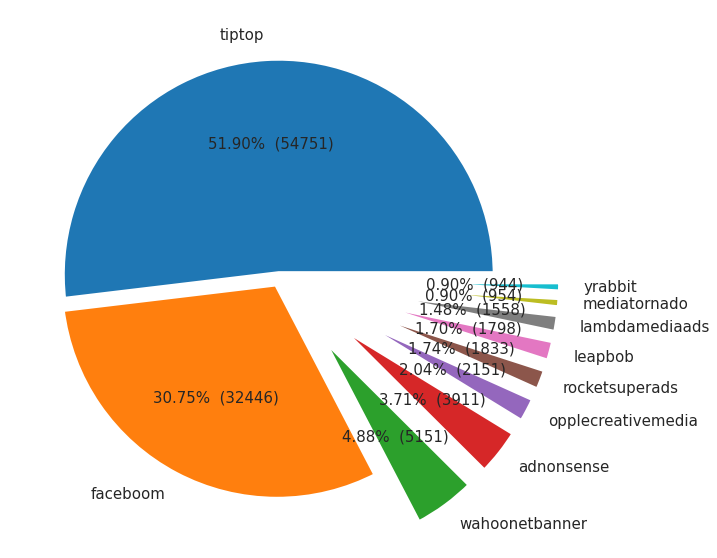

In [39]:
# срежем данные пользователей, которые пришли бесплатно
report_pie = report.query('channel != "organic"')


y = report_pie.groupby('channel').sum().sort_values(by='acquisition_cost', ascending = False)['acquisition_cost']

labels = report.groupby('channel').sum().sort_values(by='acquisition_cost', ascending = False)['acquisition_cost'].index
explode = [0.02, 0.02, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
# добавим и процент, и значение:
def make_autopct(y):
    def my_autopct(pct):
        total = sum(y)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10)) 
y.plot.pie(y=y, 
            labels=labels, 
            autopct=make_autopct(y), 
            legend = False, 
            wedgeprops={'linewidth': 7.0, 'edgecolor': 'white'},
            explode = explode,
            textprops={'size': 'x-large'},
            fontsize = 15).set(ylabel='');
   


Большая часть расходов была для канала TipTop, второе место - FaceBoom, остальные занимают сильно меньшее значение.


### Выводы:
- Общие затраты составили практически 100000
- Около 52% пошли на TipTop, около 31 - на FaceBoom.
- Остальные канады получили менее 5% каждый

Для визуализации динамики затрат по каналам, построим линейный график:

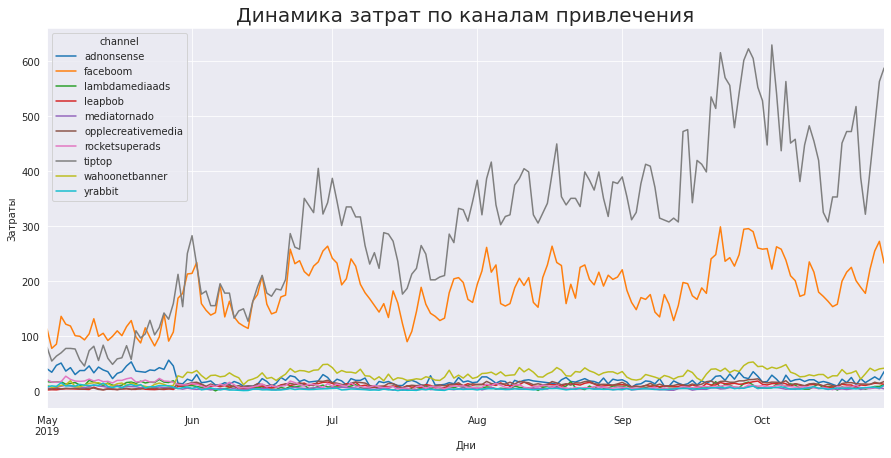

In [40]:
pivot = (costs
         .pivot_table(index=['dt'],columns='channel',values='costs')
         .plot(grid=True, title='Колебание цены'))
plt.title('Динамика затрат по каналам привлечения', fontsize=20)
plt.xlabel('Дни')
plt.ylabel('Затраты');

Данные шумные, попробуем "сгладить" их для красоты, укрупнив шаги

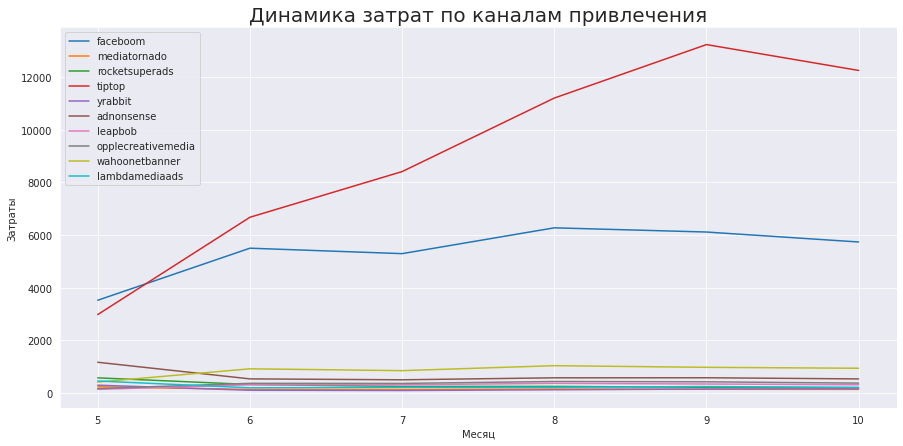

In [41]:
# вытащим данные о месяцвх для дальнейшей группировки
costs['month'] = costs['dt'].dt.month
# создадим список каналов привлечения
channel_list = costs['channel'].unique()
for channel in channel_list:
    sns.lineplot(data=costs.loc[costs['channel']==channel].groupby('month')['costs'].sum(), label=channel)

plt.title('Динамика затрат по каналам привлечения', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Затраты');

### Выводы:
- Заметно, что наибольшие затраты на FaceBoom и TipTop
- Затраты на TipTop растут до сентября, дальше начинается падение
- Затраты на FaceBoom выше, чем на другие каналы (кроме TipTop), но не показывают такой рост как у TipTop
- На остальные каналы затраты существенно ниже

### Считаем средний САС:

Найдем средний САС на одного пользователя для всего проекта и без учета самых больших каналов - TipTop и FaceBoom:

In [42]:
print('Cреднее значение САС равно', report['acquisition_cost'].mean())

print('Cреднее значение САС без учета крупных каналов равно', report.query('channel != "tiptop" & channel != "faceboom"')['acquisition_cost'].mean())


Cреднее значение САС равно 0.7032778251826568
Cреднее значение САС без учета крупных каналов равно 0.18065012882145642


Рассчитаем средний CAC по каждому каналу привлечения. Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. Сохраним результат в переменную cac, изменив название столбца acquisition_cost на cac.

In [43]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values(by='cac', ascending = False)

,cac
channel,
tiptop,2.757774
faceboom,1.113419
adnonsense,1.008023
lambdamediaads,0.727237
wahoonetbanner,0.601856
rocketsuperads,0.417431
opplecreativemedia,0.249908
mediatornado,0.219035
yrabbit,0.217087


### Выводы:
- С учетом всех каналов, средний САС составляет около 1.13, тогда как без двух крупнейших всего 0.47
- Средний САС для TipTop примерно в два раза выше среднего значения САС для всех каналов. 
- Ближе всего к среднему значентю - FaceBoom и adnonsense

#  [Оценка окупаемости рекламы](#back)
<a id='hypothesis'></a>

Установим момент и горизонт анализа данных. По условию - сейчас 1 ноября 2019

In [44]:
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Срежем данные "органических" пользователей:

In [45]:
profiles = profiles.query('channel != "organic"')

 Построим графики для оценки окупаемости рекламы:

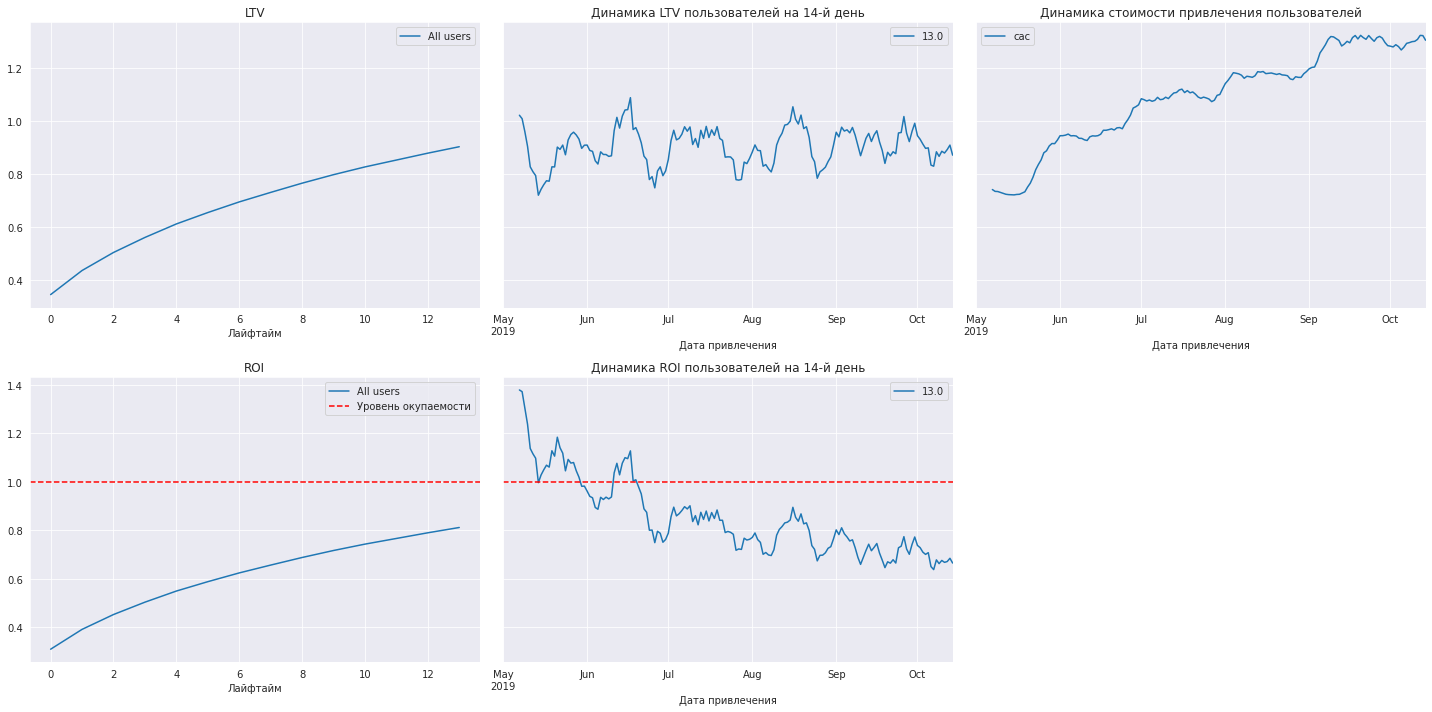

In [46]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


#### Выводы:

- Реклама не окупается. ROI в конце двух недель — ниже уровня окупаемости.
- Очевиден резкий рост САС в конце мая-июне 2019 года.
- Тогда же произошло резкое падение динамики ROI поользователей
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, качество пользователей не менялось.

Посмотрим на данные с разбивкой по регионам:

### Регионы

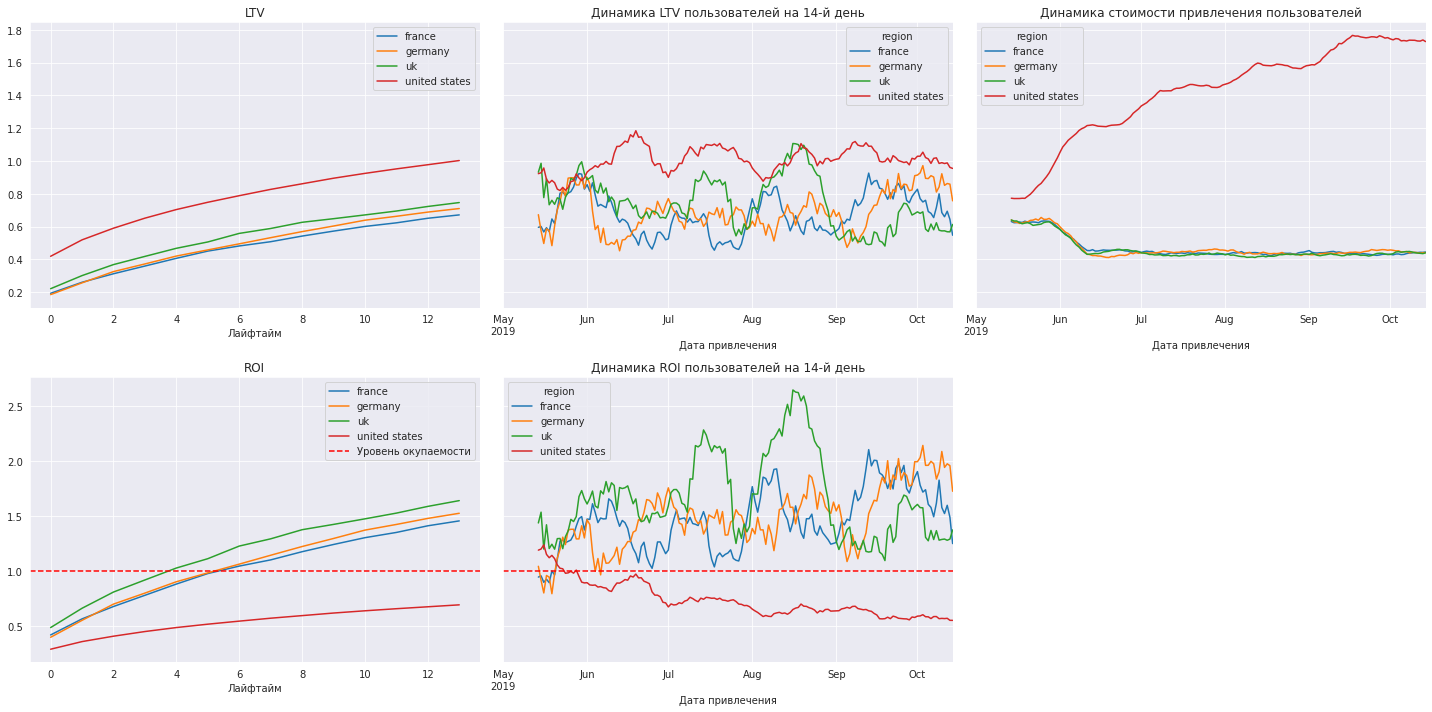

In [47]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Выводы:

- Реклама не окупается только в Америке
- Стоимость привлечения похожа для всех стран и уменьшается, но Америка резко выбивается из общей картины.
- LTV подвержен сезонности, но стабилен. Картина в США отличактся от картин в других регионах. 
- Судя по динамике ROI клиенты из США не окупаются.

Очевидно, что с привлечением пользователей из США что-то не так. 
Оценим конверсию и удержание:

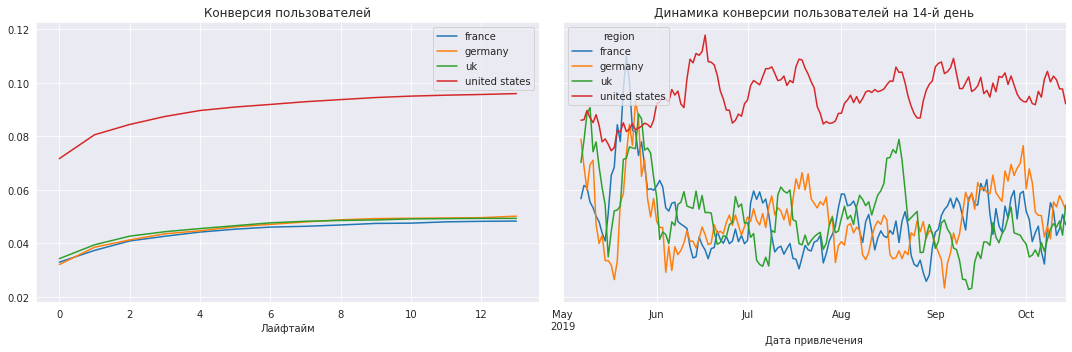

In [48]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США выше, чем в остальных регионах и стабильна. Проверим удержание:

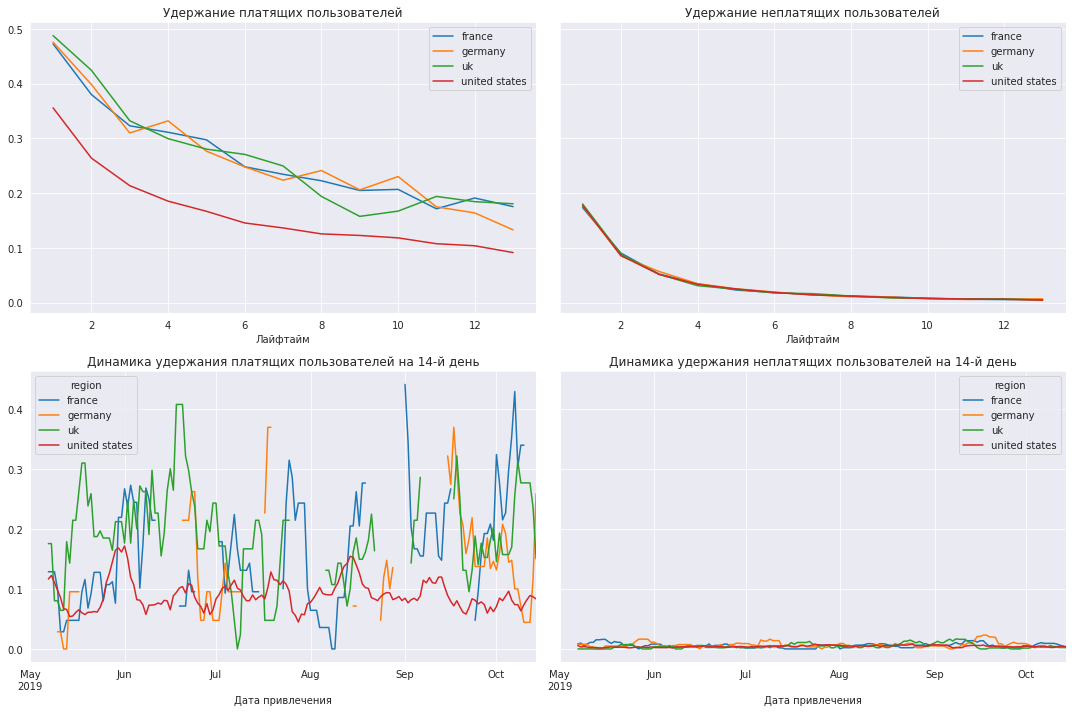

In [49]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей в США ниже примерно на 10%, чем в остальных странах, при этом динамика для неплатящих - такая же, как и в остальных странах. Необходимо понять, в чем дело.

Посмотрим на каналы привлечения:

### Каналы привлечения

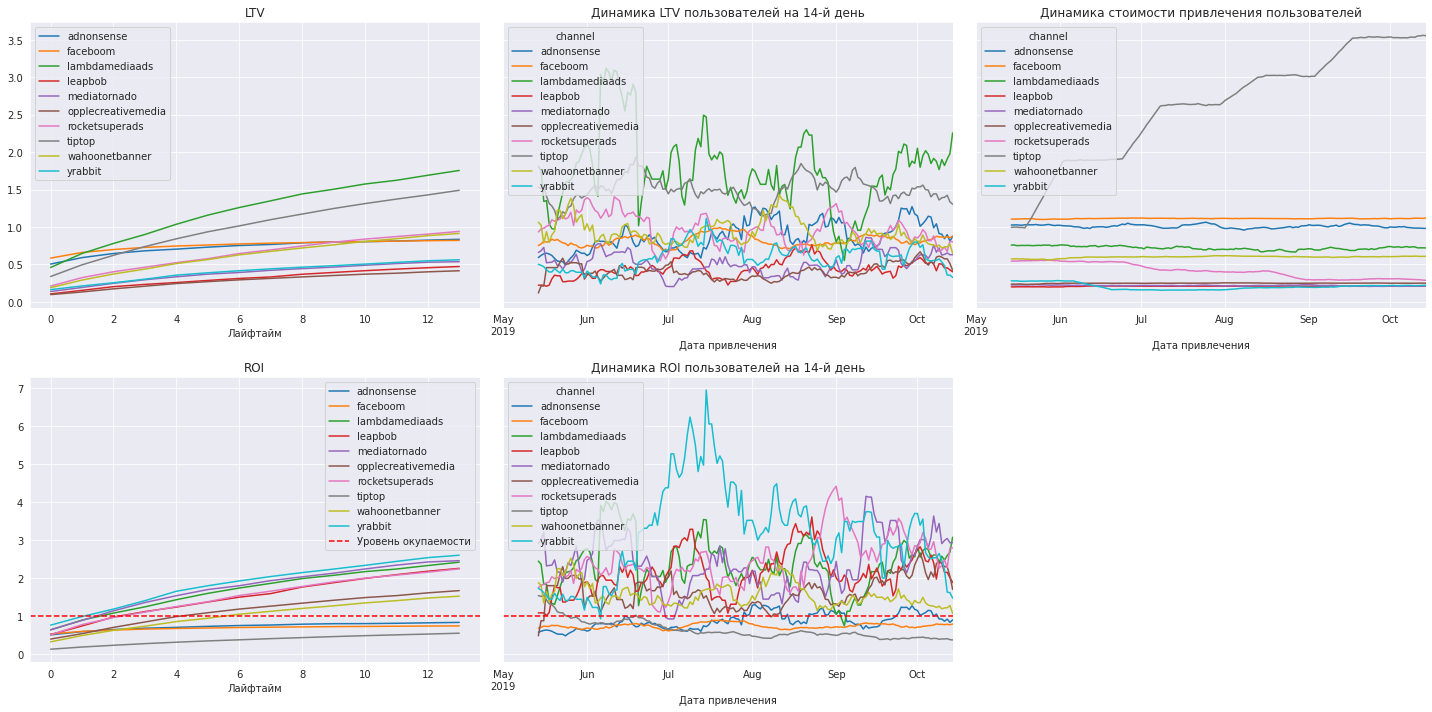

In [50]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Выводы:

- Реклама окупается только для части каналов привлечения. Такие каналы как adnonsense, faceboom, tiptop не окупаются.
- Виден резкий пик динамики для канала yrabbit в середине июля 2019. 
- Заметно очень странное поведение динамики стоимости привлечения клиентов для tiptop. Скачкообразное повышение стоимости через примерно равные промежутки времени. 
- LTV подвержен сезонности, но стабилен.

Оценим конверсию и удержание:


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Да, действительно, есть проблемы с каналом TipTop, видим значительный рост затрат на привлечение.
</div>

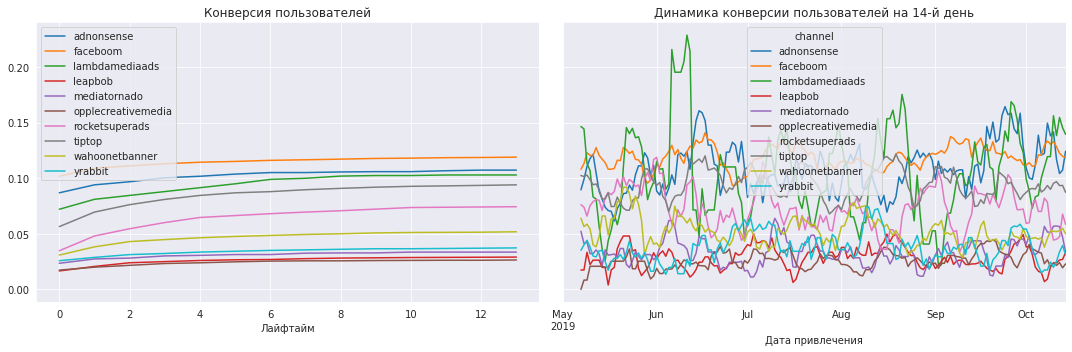

In [51]:
# смотрим конверсию с разбивкой по каналам привлечения:

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия низая и стабильная для всех источников привлечения. Посмотрим на удержание:

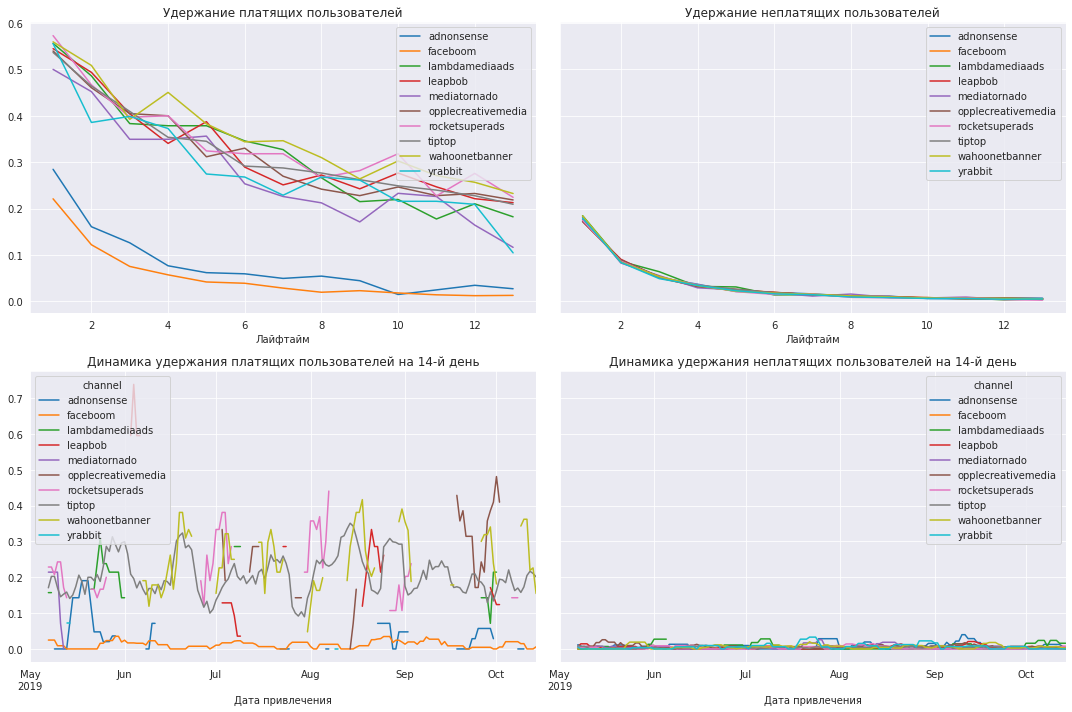

In [52]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Проблемы с удержанием платящих пользователей имеют два канала - Adnonsense и FaceBoom. Картина для неплатящих пользователей везде примерно одинаковая.

### Устройства

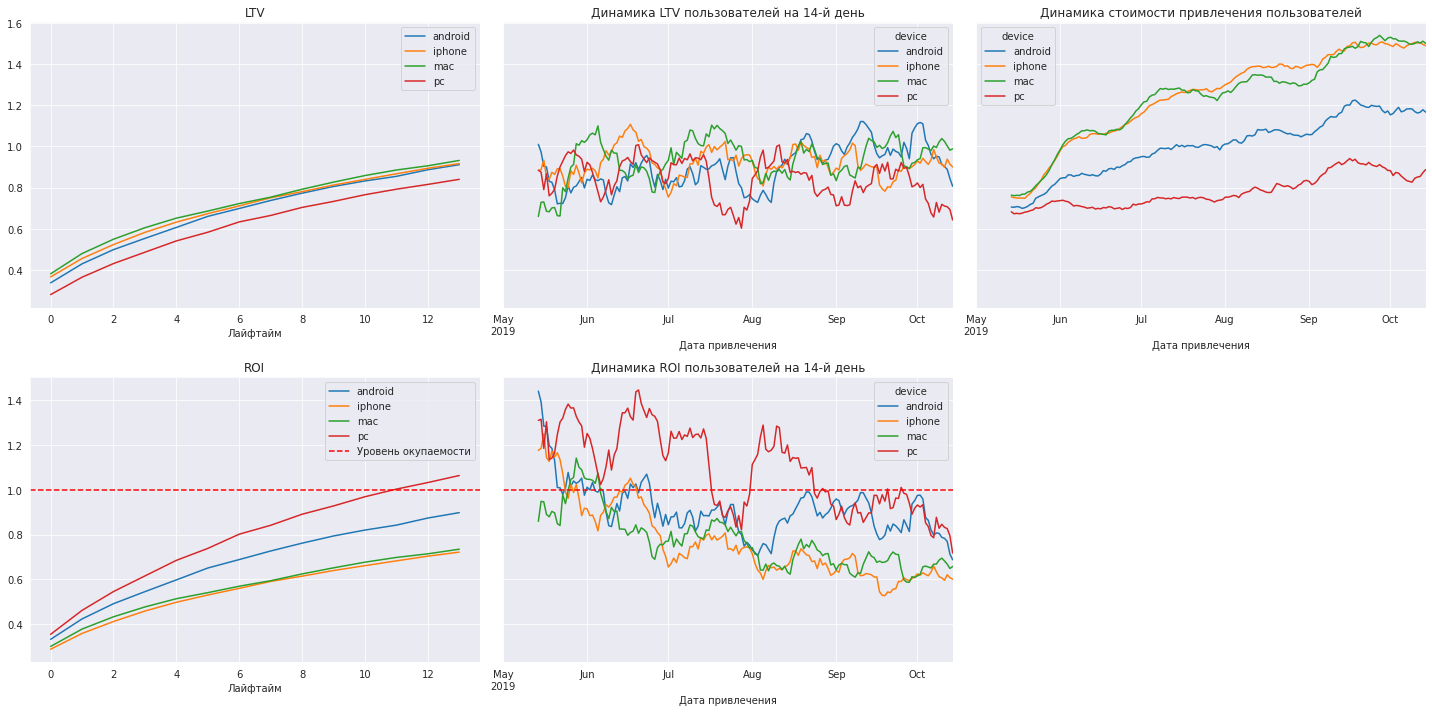

In [53]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Выводы:

- Реклама окупается только на PC.
- Динамика ROI падает для всех устройств. 
- Стоимость привлечения пользователей для PC и Android наименьшая.
- LTV подвержен сезонности, но стабилен.


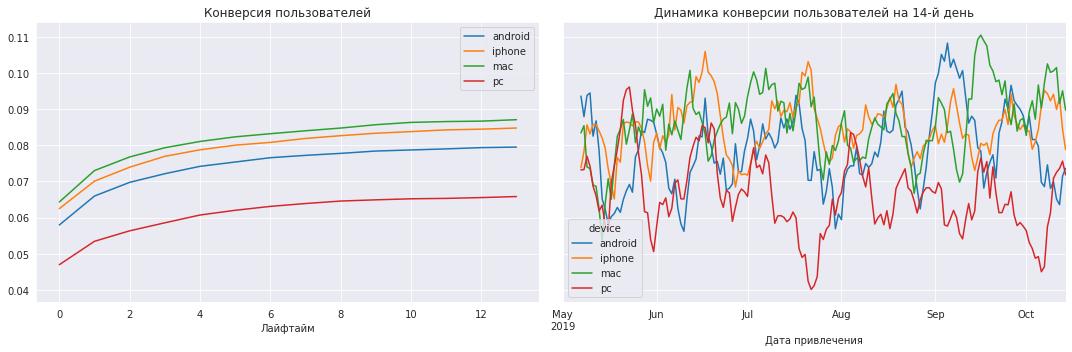

In [54]:
# смотрим конверсию с разбивкой по каналам привлечения:

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наименьшая конверсия у пользователей PC, наибольшая - у пользователей Mac.

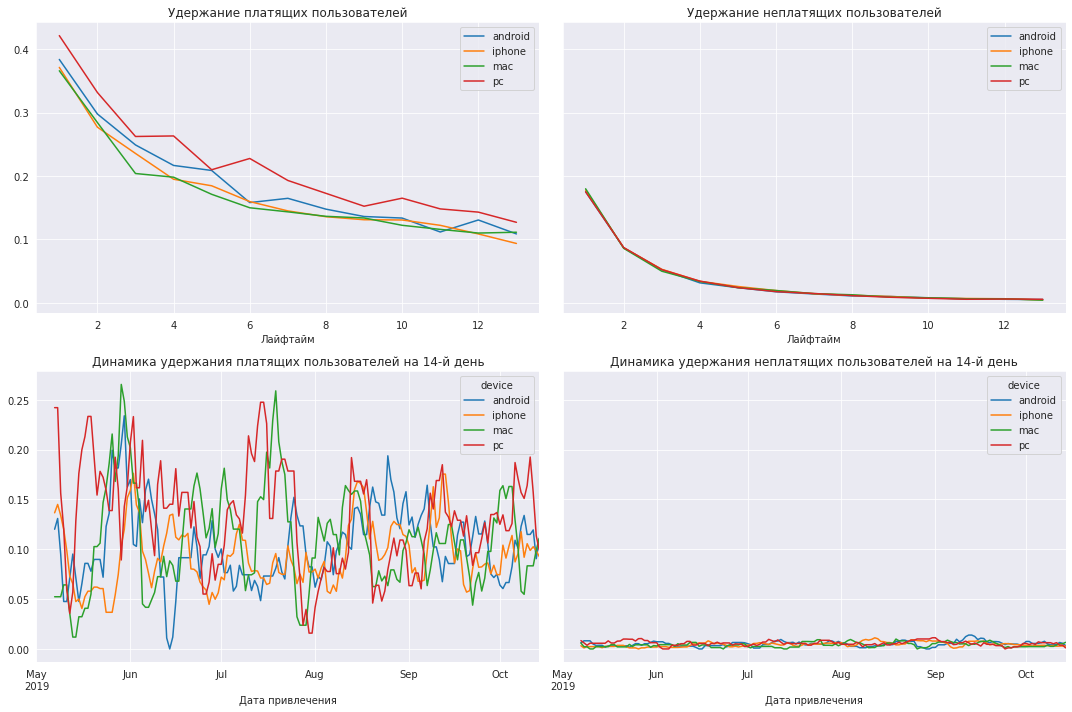

In [55]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание покупателей лучше для пользователей PC, для неплатящих - графики практически идентичны.

### Выводы по окупаемости рекламы:
- Реклама не окупается, а стоимость привлечения пользователей растет
- Особенно аномальным выглядит ситуация с пользователями из США
- Не смотря на высокую конверсию, относительно других стран, пользователи из США не окупаются.
- Удержание покупателей из США явно ниже того, на что стоит расчитывать, однако удержание пользователей, не соверщающих покупки в порядке
- Крупные каналы (Adnonsense, FaceBoom, TipTop) на привлечение пользователей в которых тратят большие деньги не окупаются.
- Cтоимость привлечения пользователей в TipTop аномально растет
- Adnonsense и FaceBoom не удерживают пользователей
- Пользователи PC окупают приложение, пользователи iPhone, Mac и Android - нет

### Рекомендации:
- Возможно, стоит внимательнее изучить работоспособность приложения для США - вероятно, оно может чем-то отличаться от Европейской версии
- Стоит попробовать перераспределить рекламные бюджеты - возможно стоит уменьшить бюджеты для FaceBoom, TipTop и Adnonsense, за счет этого можно увеличить бюджеты для других каналов или найти новые каналы.
- Стоит внимательно оценить TipTop. Затраты на привлечение растут очень быстро, а окупаемость - нет.
- Возможно, стоит подумать над тем, чтобы улучшить приложение для пользователей Apple - сейчас оно не окупается, не смотря на большую долю покупателей с iPhone и приличную конверсию.
- Возможно стоит подумать над тем, как увеличить конверсию для пользователей PC



- Из предложенных каналов стоит обратить внимание на каналы WahooNetBanner(окупается, динамика ROI стабильная, конверсия не высокая, но стабильная, хорошее удержание), LambdaMediaAds(окупается, динамика ROI стабильная, хорошая конверсия, среднее удержание), RocketSuperAds(окупается, динамика ROI хорошая, хорошая конверсия, среднее удержание) и Yrabbit(окупается, динамика ROI хорошая, конверсия не большая, удержание падает)
- Первые два стоят дороже, но показывают не плохие результаты, вторые - дешевые и в перспективе можно улучшить результат.


#  [Общий вывод](#back)
<a id='end'></a>

- Изучены различные данные приложения
- Выяснено, откуда приходят пользователи и какими устройствами они пользуются
- Посчитано, сколько стоит привлечение пользователей из различных рекламных каналов, обнаружены не выгодные каналы. Даны рекомендации по улучшению ситуации.
- Выяснено, как влияют на окупаемость каналы привлечения, устройства, страны.
- Обнаружены аномалии и даны рекомендации по улучшению ситуации. 